In [29]:
"""
---------------INTRODUCTION--------------------
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way.
As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

Data Components (https://www.kaggle.com/airbnb/seattle):
1)Listings, including full descriptions and average review score
2)Reviews, including unique id for each reviewer and detailed comments
3)Calendar, including listing id and the price and availability for that day

Lets have a look at the data and find out 
- the most reviewed place
- the price variation over the year
- the booking variation over the year and if it has any correlation to the price or any other factor.
- the stay type with the most options and market leaders.

"""

'\n---------------INTRODUCTION--------------------\nSince 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way.\nAs part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.\n\nData Components (https://www.kaggle.com/airbnb/seattle):\n1)Listings, including full descriptions and average review score\n2)Reviews, including unique id for each reviewer and detailed comments\n3)Calendar, including listing id and the price and availability for that day\n\nLets have a look at the data and find out \n- the most reviewed place\n- the price variation over the year\n- the booking variation over the year and if it has any correlation to the price or any other factor.\n- the stay type with the most options and market leaders.\n\n'

In [30]:
#to perform mathematical operations on arrays
import numpy as np
# to Analyze and Assess Data frames
import pandas as pd
# to create heatmap for correlation
import seaborn as sns
#for Visualization of data
import matplotlib.pyplot as plt
#For Machine Learning models and Predictions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Read the CSVs into Data frames and and have a view of the data.
df_listings = pd.read_csv('./listings.csv')
df_listings.head()
df_reviews = pd.read_csv('./reviews.csv')
df_reviews.head()
df_calendar= pd.read_csv('./calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [31]:
#checking columns with no null values for future reference
no_nulls=set(df_listings.columns[df_listings.isnull().mean() == 0 ])
print(no_nulls)

{'city', 'accommodates', 'cancellation_policy', 'guests_included', 'require_guest_profile_picture', 'picture_url', 'host_id', 'require_guest_phone_verification', 'price', 'longitude', 'requires_license', 'has_availability', 'smart_location', 'scrape_id', 'maximum_nights', 'room_type', 'name', 'country', 'country_code', 'experiences_offered', 'listing_url', 'host_url', 'number_of_reviews', 'description', 'availability_60', 'is_location_exact', 'jurisdiction_names', 'last_scraped', 'market', 'availability_90', 'instant_bookable', 'calendar_last_scraped', 'amenities', 'neighbourhood_cleansed', 'extra_people', 'minimum_nights', 'bed_type', 'street', 'calendar_updated', 'availability_30', 'id', 'neighbourhood_group_cleansed', 'state', 'calculated_host_listings_count', 'availability_365', 'latitude', 'host_verifications'}


In [32]:
#Let's find out The listing with most reviews 
#grouping by listing id
listings=df_reviews['listing_id'].value_counts().reset_index()
#renaming columns
listings.rename(columns={"index":"id",'listing_id':'count'},inplace=True)
print(listings)
#creating a new dataframe with just 2 columns
df2=df_listings[['id','name']]
print(df2)
#merging the 2 data frames to link the most reviewed properties to their names which were part of the different CSV
result=pd.merge(df2,listings,on="id")
print(result.sort_values(by=['count'], ascending=False))

           id  count
0      208356    474
1      365550    466
2       25002    404
3       47196    353
4       63308    320
...       ...    ...
3186  4825073      1
3187  6392029      1
3188   716829      1
3189  8327083      1
3190  8350401      1

[3191 rows x 2 columns]
            id                                 name
0       241032         Stylish Queen Anne Apartment
1       953595   Bright & Airy Queen Anne Apartment
2      3308979  New Modern House-Amazing water view
3      7421966                   Queen Anne Chateau
4       278830       Charming craftsman 3 bdm house
...        ...                                  ...
3813   8101950   3BR Mountain View House in Seattle
3814   8902327    Portage Bay View!-One Bedroom Apt
3815  10267360    Private apartment view of Lake WA
3816   9604740    Amazing View with Modern Comfort!
3817  10208623            Large Lakefront Apartment

[3818 rows x 2 columns]
           id                                 name  count
1225   208356   

In [33]:
#function to plot 
def lets_plot(df_to_plot,figsizeX,figsizeY,plot_color,plot_type,xlabel,ylabel):
    if(plot_type=='pie'):
        df_to_plot.plot(figsize=(figsizeX,figsizeY),kind=plot_type)
        plt.show()
    else:
        df_to_plot.plot(figsize=(figsizeX,figsizeY),kind=plot_type,color=plot_color)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

In [34]:
#Max Price variation

# lets remove the null values first [ Cleaning the Data]
df_price=df_calendar[df_calendar['price'].notna()]
print(df_calendar.shape[0])
print(df_price.shape[0])

#dropping columns that are not needed
df_price=df_price.drop(['available', 'listing_id'], axis=1)
#converting price String to price Numberic
df_price['price'] = df_price['price'].str.replace('$','')
df_price['price'] = df_price['price'].str.replace(',','')
df_price[['price']] = df_price[['price']].apply(pd.to_numeric)
#sorting values by proce and the grouping by Date,Price and getting the max price on each day
df_price=df_price.sort_values(by=['date'], ascending=True)
df_price_most_busy=df_price.loc[df_price.groupby('date')['price'].idxmax()]
print(df_price_most_busy)
lets_plot(df_price_most_busy,200,100,'red','bar','Date Range','Price ( $)')


1393570
934542


<ipython-input-34-67d26986996b>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_price['price'] = df_price['price'].str.replace('$','')


               date   price
730      2016-01-04   975.0
1256696  2016-01-05   950.0
1256697  2016-01-06   950.0
1256698  2016-01-07   950.0
1256699  2016-01-08   950.0
...             ...     ...
1090     2016-12-29  1650.0
1091     2016-12-30  1650.0
1092     2016-12-31  1650.0
1139893  2017-01-01  1000.0
919434   2017-01-02  1000.0

[365 rows x 2 columns]


In [35]:
#most busisiest day
#geeting the rows where price is null as those were booked
df_busy=df_calendar[df_calendar['price'].isna()]
# Getting the dates and the number of bookings on each date
df_most_busy=df_busy['date'].value_counts()
print(df_most_busy)
lets_plot(df_most_busy,200,100,'blue','bar','Date Range','Number of Bookings')


2016-01-04    2083
2016-01-07    2042
2016-01-08    2036
2016-01-06    1992
2016-01-09    1962
              ... 
2016-12-28     985
2016-12-29     983
2016-12-30     978
2016-12-31     959
2017-01-01     896
Name: date, Length: 365, dtype: int64


House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64


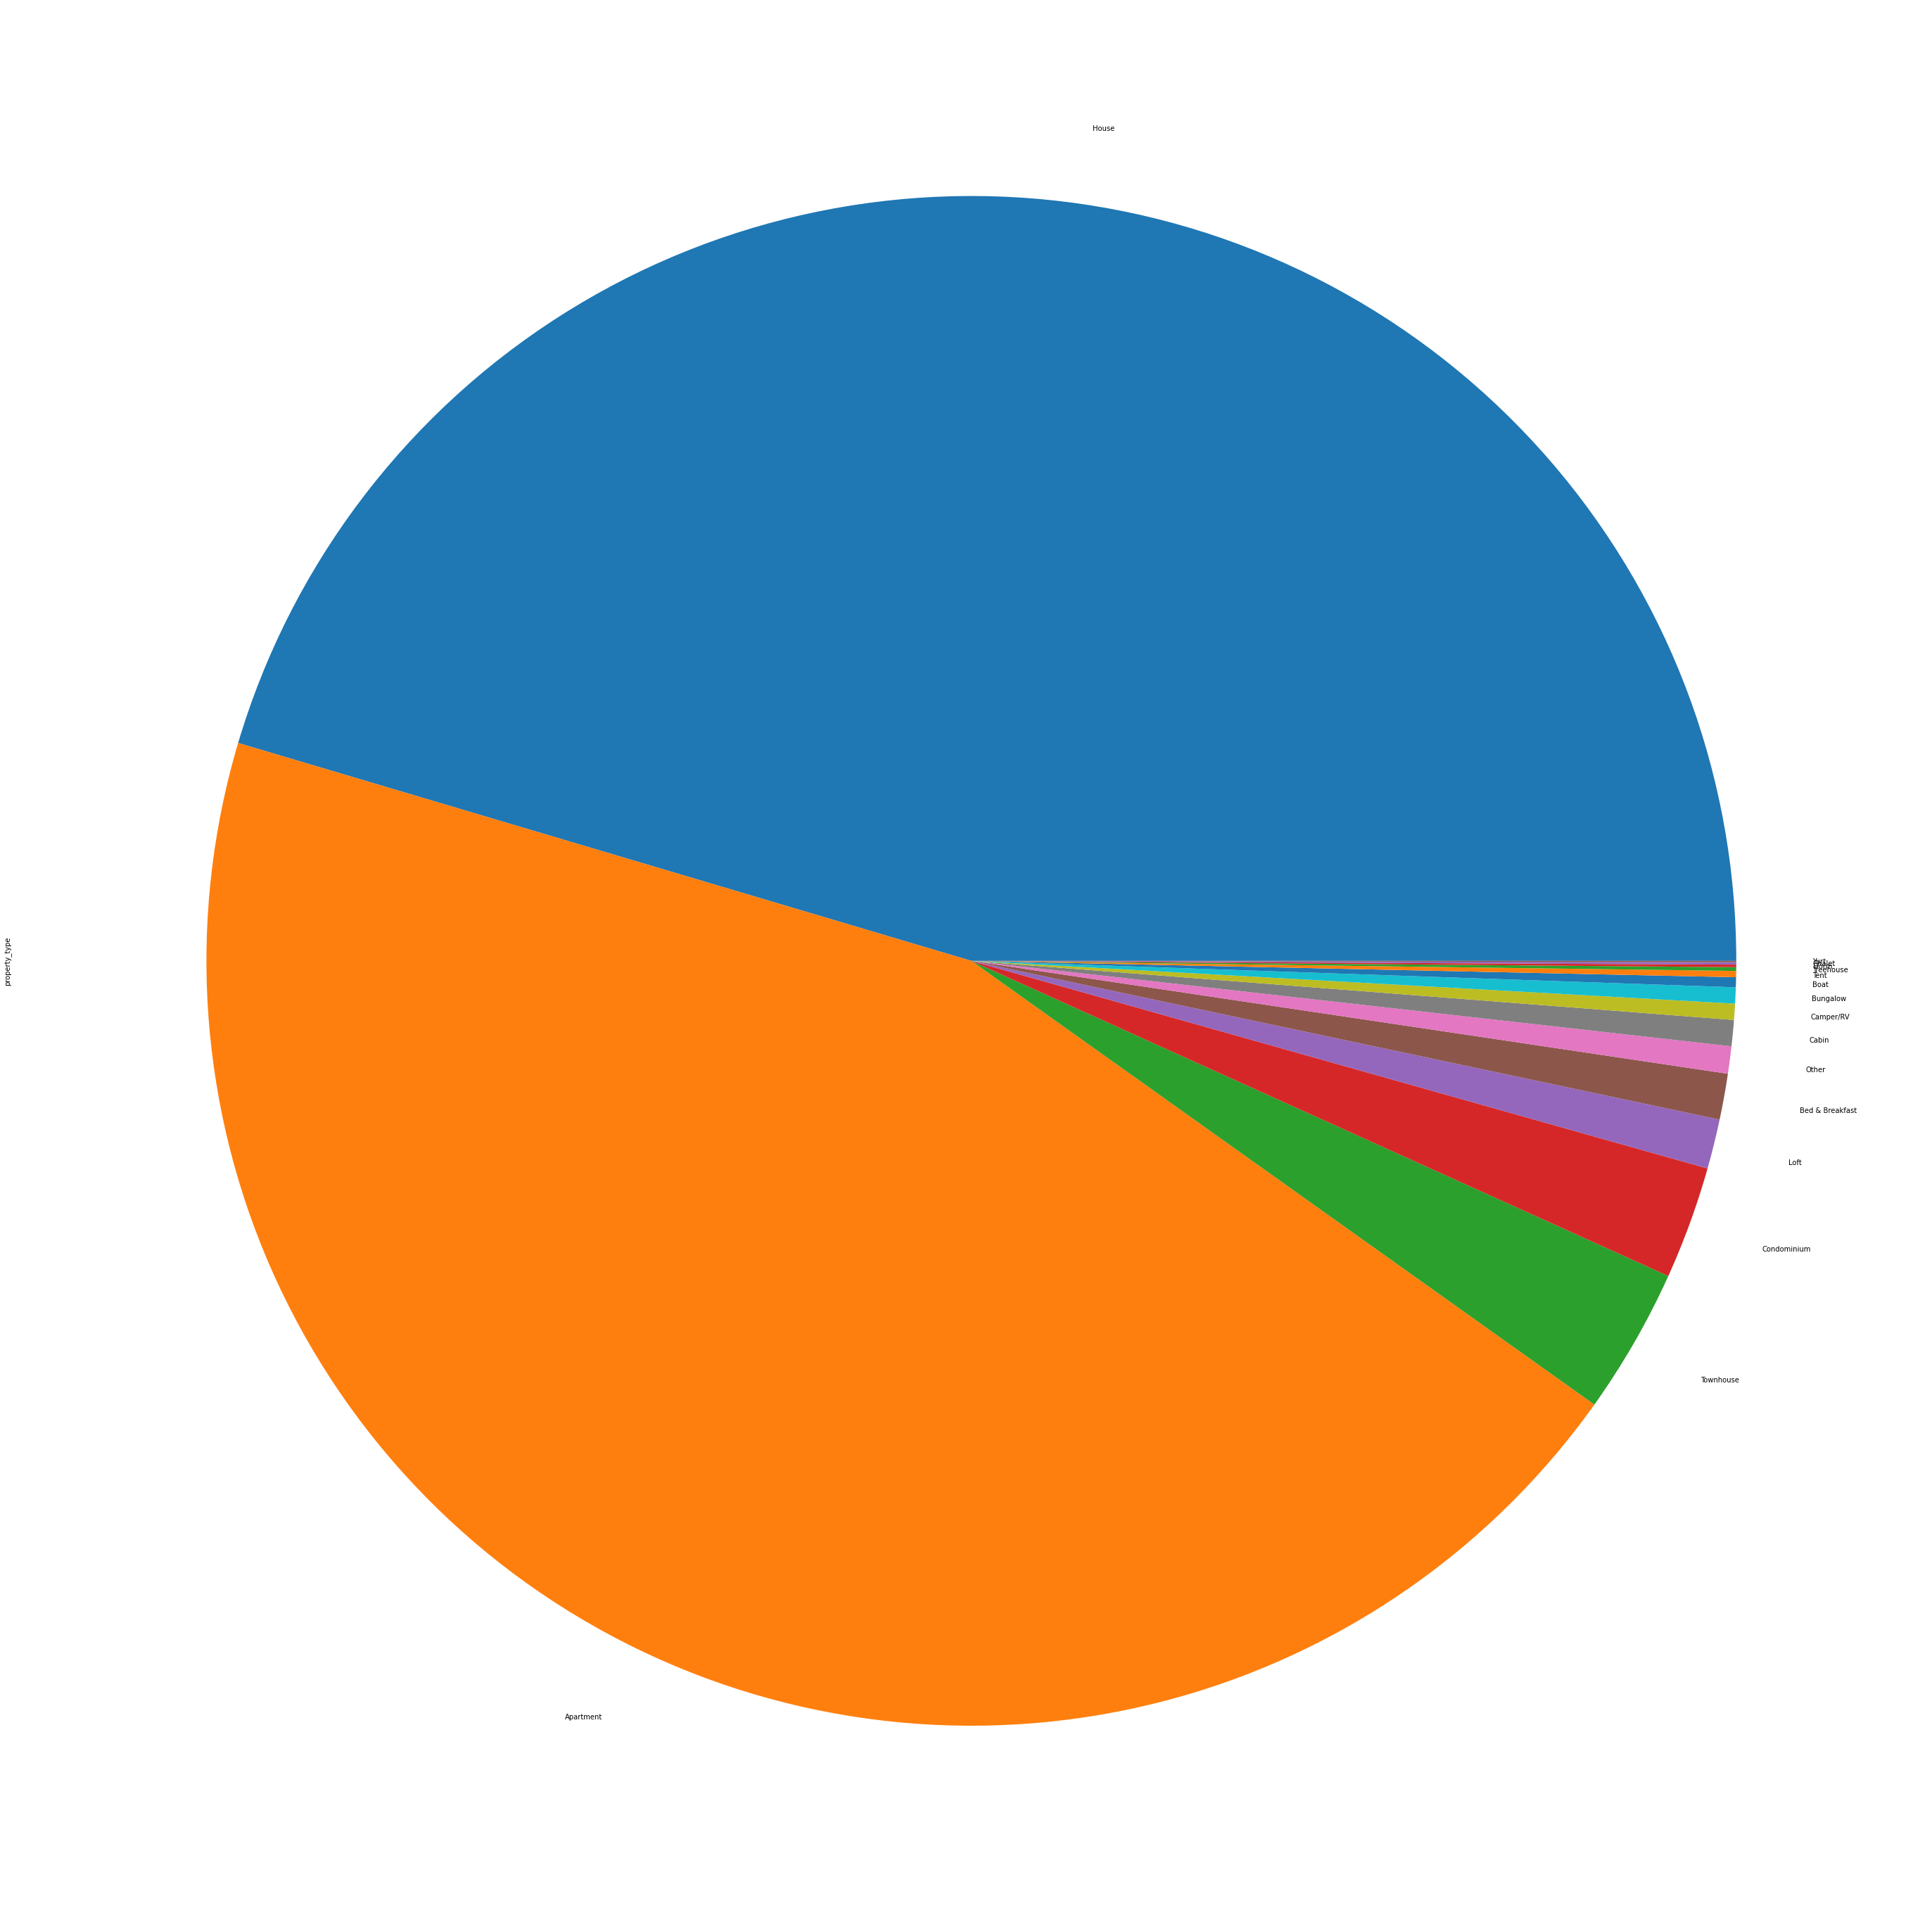

In [36]:
#taking stock of property type
df_listings_propety_type_count=df_listings['property_type'].value_counts()
print(df_listings_propety_type_count)
lets_plot(df_listings_propety_type_count,50,50,'','pie','','')
